In [1]:
# https://www.youtube.com/watch?v=zUqa6KcwRhs&t=995s

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
df = pd.read_csv('C:\\Users\\Kin Cheng\\Desktop\\creditcard.csv')

In [6]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Text(0,0.5,'Freq')

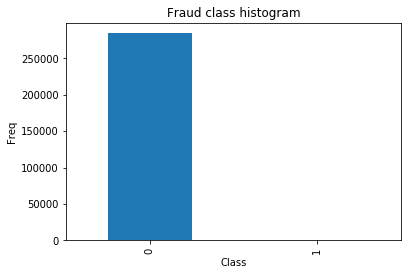

In [11]:
count_classes = pd.value_counts(df['Class'], sort=True).sort_index()
count_classes.plot(kind='bar')
plt.title('Fraud class histogram')
plt.xlabel('Class')
plt.ylabel('Freq')

In [15]:
from sklearn.preprocessing import StandardScaler

df['normAmount'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1,1))
df = df.drop(['Time', 'Amount'],axis=1)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [17]:
X = df.loc[:, df.columns != 'Class']
y = df.loc[:,df.columns == 'Class']

In [43]:
# num of data points in minority class
num_records_fraud = len(df[df['Class'] == 1])
fraud_indices = np.array(df[df.Class == 1].index)

# picking the indicies of the normal classes
normal_indices = df[df['Class'] == 0].index

In [46]:
# out of the indicies we picked, randomly select x number (number_record_fraud)
random_normal_indices = np.random.choice(normal_indices, num_records_fraud, replace=False)
random_normal_indices = np.array(random_normal_indices)

In [57]:
# appending the 2 indices
under_sample_indices = np.concatenate([fraud_indices, random_normal_indices])

# under ample dataset
under_sample_data = df.iloc[under_sample_indices, :]

X_undersample = under_sample_data.loc[:, under_sample_data.columns != 'Class']
y_undersample = under_sample_data.loc[:, under_sample_data.columns == 'Class']

# showing ratio
print('Percentage of normal transactions: ', len(under_sample_data[under_sample_data['Class'] == 0])/len(under_sample_data))
print('Percentage of fraud transactions: ', len(under_sample_data[under_sample_data['Class'] == 1])/len(under_sample_data))
print('Total number of transactions in resampled data: ', len(under_sample_data))

Percentage of normal transactions:  0.5
Percentage of fraud transactions:  0.5
Total number of transactions in resampled data:  984


In [60]:
from sklearn.model_selection import train_test_split

# whole dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=(0.3), random_state=0)

print('Number of transactions train dataset: ', len(X_train))
print('Number of transactions test dataset: ', len(X_test))
print('Total number of transactions ', len(X_train) + len(y_train))

# resampled dataset
X_train_undersample, X_test_undersample, y_train_undersample, y_test_undersample = train_test_split(X_undersample, y_undersample, test_size=(0.3), random_state=0)
print('')
print('Number of transactions train dataset: ', len(X_train_undersample))
print('Number of transactions test dataset: ', len(y_test_undersample))
print('Total number of transactions ', len(X_train_undersample) + len(y_test_undersample))

Number of transactions train dataset:  199364
Number of transactions test dataset:  85443
Total number of transactions  398728

Number of transactions train dataset:  688
Number of transactions test dataset:  296
Total number of transactions  984
